<a href="https://colab.research.google.com/github/master1223347/Assorted-ML-Projects/blob/main/Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

For this assignment, you will use the dataset loaded below (or another appropriate dataset of your choice) to perform the following steps that were demonstrated in the practice Notebook.

**Do not delete any instructor-provided cells from this Notebook.** If you accidentally delete a cell, you can either undo the action or load a copy of the original assignment Notebook in a new browser tab and copy over the missing cells.

**You can add cells to this Notebook.** To add a markdown (text) cell, hover your cursor beneath the cell where you want to insert and click the "+Text" button. To add a Python (code) cell, click the "+Code" button.

### Steps
- Inspect and display at least one image from the dataset
- Split the data into training and test sets
- Train a binary classifier
  - Create a binary label vector
  - Compare against a baseline dummy classifier
  - Evaluate accuracy using k-fold cross-validation
  - Report precision, recall, and F1 score
  - Display a confusion matrix
- Train a multiclass classifier
  - Fit the model and make predictions on the test set
  - Report your findings from the larger confusion matrix

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import dummy
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

The following variable will be used to set a random seed for certain processes. Using a seed makes random processes deterministic, meaning this notebook will do things like split data the same way on each run. You are free to change this value to explore how the notebook runs differently.

In [ ]:
seed = 63

## Load the Dataset

The [A-Z Handwritten Alphabets dataset](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format) is a large-scale collection of grayscale images representing handwritten English capital letters. It contains over 370,000 samples, with each image sized at 28x28 pixels and centered for consistency. Each sample is labeled from A to Z.

To ease runtime, I have sampled 10% of this dataset and intentionally kept the classes in their original proportions.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dkauffman-foothill/course-datasets/refs/heads/main/ml/alphabet-images-sampled.csv", index_col=0)

Below, the feature matrix and label vector are separated as NumPy arrays. You do not need to modify this code.

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X.shape, y.shape

((37245, 784), (37245,))

## Inspect the Data

To verify the data was loaded correctly, choose an English uppercase character for the string below and proceed to get the index of its first occurrence in the label vector `y` (see the Practice Notebook for an example).

In [ ]:
character = "D"  # Enter an uppercase character from A to Z in this string.


char_index = np.where(y == character)[0][0]

 Next, get the image data at that same index in `X` and store it in a variable called `char_image` (replacing `None` below). The code to display the image is already provided for you afterward.

In [ ]:
char_image = X[char_index]  # Use the index found above to index on X here.
char_image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  55, 255, 154,  11,  3

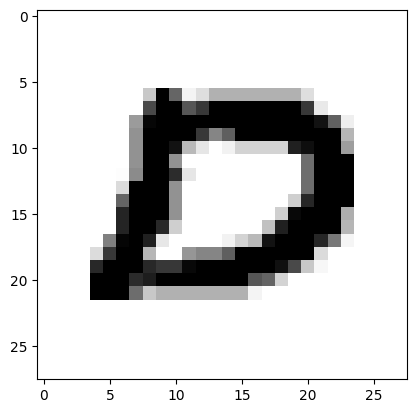

In [ ]:
plt.imshow(char_image.reshape(28, 28), cmap="binary")  # You do not need to change this line.

## Prepare the Data

As this dataset is already clean, you only need to split it into training and test sets.

### Split the Data

Use `model_selection.train_test_split` to create training and test sets.

Optionally, you can set the `train_size` keyword to be a value from 0 to 1 indicating the size of the training set (e.g. a value of 0.8 means 80% of the data will be used for training). By default, scikit-learn uses a value of 0.75.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=seed, train_size=0.8)

## Train a Binary Classifier

Before trying to make predictions for all characters, make a binary classifier that determines whether a sample is or is not the character you chose above.

### Create a Binary Label Vector
Create a vector of true/false values (as in the Practice Notebook) in which true corresponds to a row matching the character.

In [ ]:
y_train_binary = (y_train == character)
y_test_binary = (y_test == character)

### Compare to a Baseline

Use a Dummy Classifier to get a baseline for this task. Instantiate and fit `dummy.DummyClassifier` to the binary label vector and use `model_selection.cross_val_score` with at least 3 validation folds.

In [ ]:
dummy_clf = dummy.DummyClassifier()
dummy_clf.fit(X_train, y_train_binary)

dummy_scores = model_selection.cross_val_score(
    dummy_clf,
    X_train,
    y_train_binary,
    cv=4,
    scoring = "accuracy"
    )
dummy_scores

array([0.97315076, 0.97315076, 0.97301651, 0.97301651])

### Create a Real Classifier

Using your binary label vector, instantiate and fit a SGD classifier (or any scikit-learn classifier of your choice).

In [ ]:
sgd_clf = linear_model.SGDClassifier(random_state=seed)
sgd_clf.fit(X_train, y_train_binary)

SGDClassifier(random_state=63)

In [ ]:
sgd_clf.predict([X_train[char_index]])

array([False])

### Evaluate Accuracy with K-Fold Cross-Validation

Use `model_selection.cross_val_score` to get accuracy scores across at least 3 validation folds.

In [ ]:
model_selection.cross_val_score(
    sgd_clf,
    X_train,
    y_train_binary,
    cv=5,
    scoring="accuracy"
)


array([0.97785235, 0.97566706, 0.97516362, 0.97801645, 0.98053365])

### Capture Precision, Recall, and F1 Score

Using scikit-learn's `metrics` subpackage, get the precision, recall, and f1 score of the SGD classifier's predictions.

In [ ]:
y_train_pred = model_selection.cross_val_predict(
    sgd_clf,
    X_train,
    y_train_binary,
    cv=5
)

In [ ]:
metrics.precision_score(y_train_binary, y_train_pred)

0.599388379204893

In [ ]:
metrics.recall_score(y_train_binary, y_train_pred)

0.48877805486284287

In [ ]:
metrics.f1_score(y_train_binary, y_train_pred)

0.5384615384615384

### Display a Confusion Matrix

Get a vector of predictions by calling `model_selection.cross_val_predict` using the features and binary label vector.

In [ ]:
y_train_pred = model_selection.cross_val_predict(
    sgd_clf,
    X_train,
    y_train_binary,
    cv=5
)

With these predictions, call `metrics.ConfusionMatrixDisplay.from_predictions` with the binary label vector.

You may wish to set the following keyword arguments (though you can choose a different color scheme if you prefer):
- `cmap="Blues"`
- `colorbar=False`

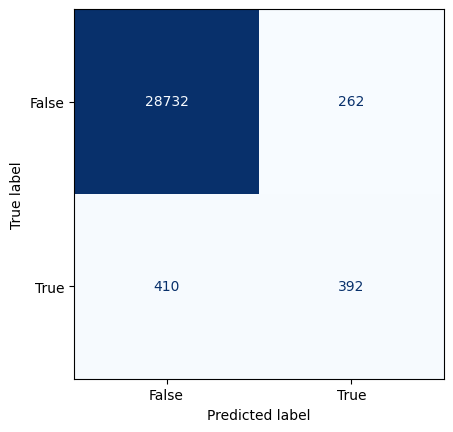

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_train_binary,
    y_train_pred,
    cmap="Blues",
    colorbar=False
)

### Report Findings

Based on the following:
- The accuracy of the dummy classifier
- The outcome of the real binary classifier
  - Accuracy
  - Precision, Recall, F1 score

What is your assessment of how well the real classifier performs? Is there one metric that reveals more than the others?




The real classifer preforms a lot worse on precision, recall, and F1 score than on accuracy. This might be because the accuracy score takes into account all of the correct predictions which imclude all the predictions which correctly identify the character as not the chosen character. While the F1 score gives up the models ability to identifythe specific character.



## Train a Multiclass Classifier

Using the original training label vector (not the binary label vector), instantiate and fit a SGD classifier (or another classifier of your choice) along with the training features.

In [ ]:
sgd_clf_multiclass = linear_model.SGDClassifier(random_state=seed)


sgd_clf_multiclass.fit(X_train, y_train)

SGDClassifier(random_state=63)

Use the `predict` method for the classifier on the test features.

In [ ]:
y_pred = sgd_clf_multiclass.predict(X_test)
y_pred

array(['N', 'A', 'U', ..., 'E', 'O', 'P'], dtype='<U1')

### Display a Confusion Matrix

The code below is provided because of the need for additional keyword arguments that allow the entire matrix to display.

See below the matrix to report your findings.

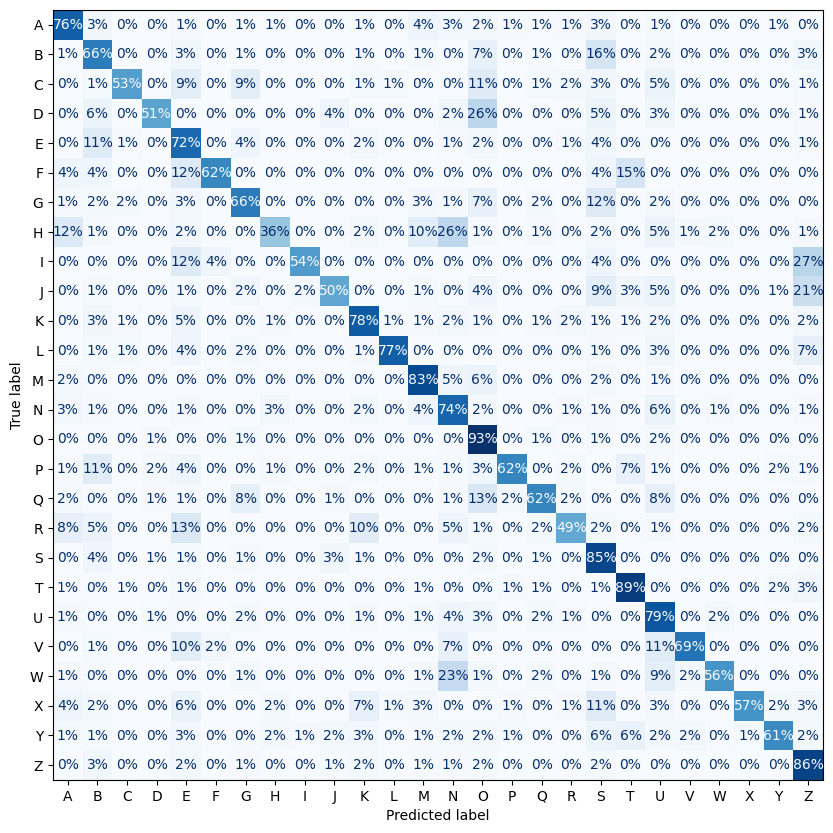

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize="true",
    values_format=".0%",
    cmap="Blues",
    colorbar=False,
    ax=plt.subplots(figsize=(10, 10))[1]
)

### Report Findings

Based on the confusion matrix, where does it appear the classifier had the most difficulty? What characters did it confuse the most? Does it align with your expectations? Why or why not?

It appears it had the most difficulty with J and Z. It confused J and S the most along with D and O. It aligns with my expectations since there characters have similar patterns.

---

Optionally, you may find it helpful to display more images below for the characters that the model got confused. I have copied the `plt.imshow` function call below; replace `None` with one of the images from `X_test` to display that image.

Recall that you can get the index of a specific character in `y_test` by using the `np.where` function (see the Practice Notebook) and then indexing at that same location in `X_test`.

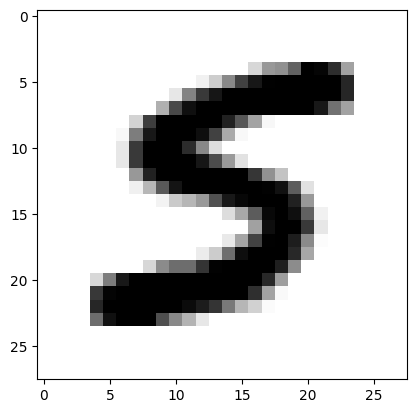

In [ ]:
char_image = X_test[1892]
plt.imshow(char_image.reshape(28, 28), cmap="binary")